# Heart Diseases Culprit - Analysis and Prediction for the next 10 years
### Author: Phuong Minh Nguyen

<img src='heart-disease-ribbon-vector-3568219.jpg'>

# Introduction:

World Health Organization (WHO) has estimated approxiamte 12 million deaths all arround the world, every year because of the heart diseases. Some analysis shows that cardio vascular diseases cause half the deaths in the United States and other countries. The more early prognosis of cardiovascular diseases is made, the more accurately decisions is chosen on lifestyle changes in high risk patients, as a reseulte the less severe the complications are. This analysis intends to combine the most relevant risk factors of heart disease, as well as predict the overall risk by using variety of Machine Learning models.

The dataset is publically available on the Kaggle website (link below), and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

<a id='toC'></a>
<b><font size="5" color="black">Table of Contents</font></b>
<ul type="1">
    <li><a href='#Data_Preprocessing'>Data Preprocessing</a></li>
    <li><a href='#Data_Visualization'>Data Visualization</a></li>
    <li><a href='#Feature_selection'>Feature selection</a></li>
    <li><a href='#Machine_Learning_model'>Machine Learning model</a></li>
    <li><a href='#conclusion'>Conclusion</a></li>
</ul>

In [93]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

<a id='Data_Preprocessing'></a>

# Data Preprocessing
Inspect the data: Handle any missing data, irrelevant data and do a cleanup.

In [94]:
#Read the training & test data
df = pd.read_csv('framingham.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.0 KB


This data set contains 4240 heart attack patient records published in Nov 2017. Each patient with some background medical history and lifestyle was put under supervision. Some were diagnosed to have coronary heart disease CHD and some were not. This data analysis target is to make an accurate prediction on a patient's risk rate based on their current status.

In [95]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Each attribute is a potential risk factor. There are demographic, behavioural and medical risk factors.

### - Demographic:

    -  sex: male or female;(Nominal)
    -  age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    -  education: levels coded 1 for some high school, 2 for a high school diploma or GED, 3 for some college or vocational school, and 4 for a college degree.

### - Behavioural

    -  currentSmoker: whether or not the patient is a current smoker (Nominal)
    -  cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

### - Medical( history):

    -  BPMeds: whether or not the patient was on blood pressure medication (Nominal)
    -  prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
    -  prevalentHyp: whether or not the patient was hypertensive (Nominal)
    -  diabetes: whether or not the patient had diabetes (Nominal)

### - Medical(current):

    -  totChol: total cholesterol level (Continuous)
    -  sysBP: systolic blood pressure (Continuous)
    -  diaBP: diastolic blood pressure (Continuous)
    -  BMI: Body Mass Index (Continuous)
    -  heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    -  glucose: glucose level (Continuous)

### - Predict variable (desired target):

    -  10 year risk of coronary heart disease (CHD) (binary: “1”, means “Yes”, “0” means “No”)

In [96]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is:', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset, these rows can be dropped without causing much error to the remining dataset.')

Total number of rows with missing values is: 582
since it is only 14 percent of the entire dataset, these rows can be dropped without causing much error to the remining dataset.


In [97]:
# remove any null values & Check for any null values
df = df.dropna(how='any',axis=0)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<a id='Data_Visualization'></a>
# Data Visualization
Graph correlations between features 

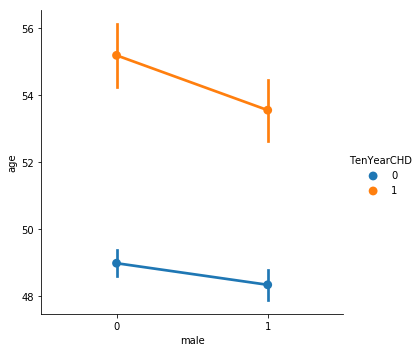

In [98]:
sns.factorplot(x='male', y='age', hue='TenYearCHD', data=df);

Based on this visualization, male experienced the CHD more earlier than female.

In [99]:
# count how many patients having CHD, based on their gender
df['count'] = 0
print(df[['male', 'TenYearCHD','count']].groupby(['male','TenYearCHD'], as_index=False).count().sort_values(by='male', ascending=True))
# 1 mean has CHD, 0 mean not

   male  TenYearCHD  count
0     0           0   1785
1     0           1    250
2     1           0   1316
3     1           1    307


**The number of patients have CHD**
1.   Female
  *   no CHD: 1785
  *   has CHD: 250
2.   Male
  *   no CHD: 1316
  *   has CHD: 307

In [100]:
# no need the count column anymore, drop it
df = df.drop(['count'], axis=1)

# the average age of patients suffered from heart diseases in each group?
df.groupby(['male','TenYearCHD'])['age'].mean()

male  TenYearCHD
0     0             48.976471
      1             55.180000
1     0             48.332067
      1             53.543974
Name: age, dtype: float64

**The average age of patient for heart disease based on gender**

1.   Female average age
  *   no CHD: 48.97
  *   has CHD: 55.18
2.   Male average age
  *   no CHD: 48.33
  *   has CHD: 53.54

**Gender and Age**

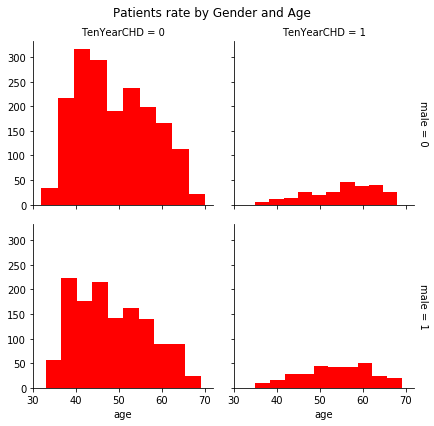

In [101]:
g = sns.FacetGrid(df, col='TenYearCHD', row='male', margin_titles=True)
g.map(plt.hist, 'age', color='red')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Patients rate by Gender and Age');

This upcoming part is the corelation between some most positive correlation features.
To get a fully comprehensive view of all features, skip this part and go to the next part
<a href='#Feature_selection'>Feature selection</a>

**systolic blood pressure (sysBP) and hypertensive (prevalentHyp)**

We can see that systolic blood pressure and hypertensive are highly positive corelated, aka the patient who has sysBP is more likely to have prevalentHyp.

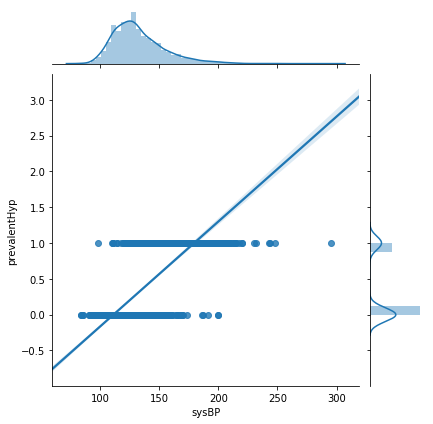

In [102]:
sns.jointplot('sysBP', 'prevalentHyp', data=df, kind='reg')

**diastolic blood pressure (diaBP) and hypertensive (prevalentHyp)**

Once again, diastolic blood pressure and hypertensive are highly positive corelated, aka the patient who has diaBP is more likely to have prevalentHyp.

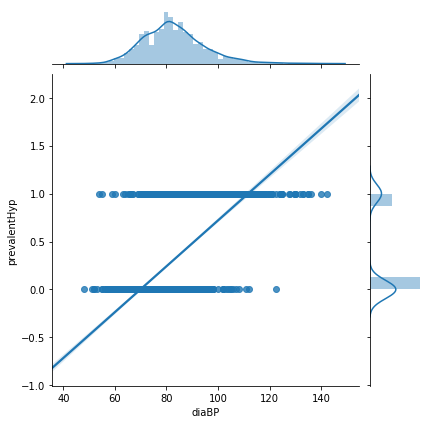

In [103]:
sns.jointplot('diaBP', 'prevalentHyp', data=df, kind="reg")

**diastolic blood pressure (diaBP) and systolic blood pressure (sysBP)**

From the previous observation, there is a high relationship between sysBP-prevalentHyp and diaBP-prevalentHyp, we can make a guess whether there is a positive correlation between sysBP and diaBP. The below result shows that these 2 features are also mutual related.

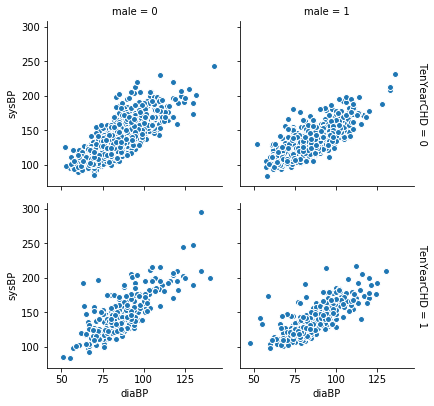

In [104]:
g = sns.FacetGrid(df, col='male', row='TenYearCHD', margin_titles=True)
g.map(plt.scatter,'diaBP' , 'sysBP', edgecolor='w')
plt.subplots_adjust(top=0.9)

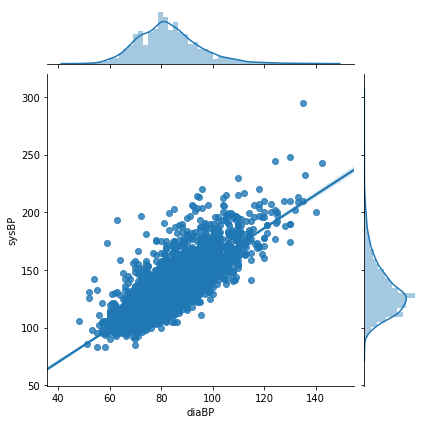

In [105]:
sns.jointplot('diaBP' , 'sysBP', data=df, kind="reg")

**glucose level (glucose) and diabetes (diabetes)**

This correlation is quite perspicuously, as the patient with high glucose level is more likely to have diabetes.

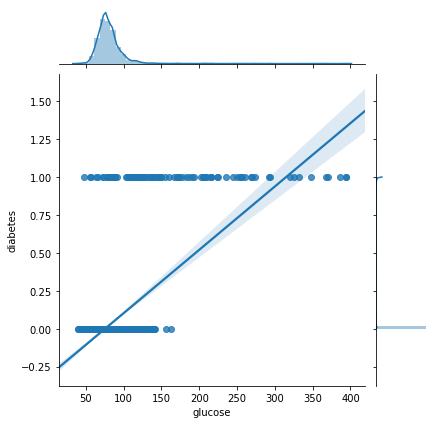

In [106]:
sns.jointplot('glucose', 'diabetes', data=df, kind='reg')

<a id='Feature_selection'></a>
# Feature selection:
Identify correlations and drop unneeded columns based on part 2

**Let's see the heat map**






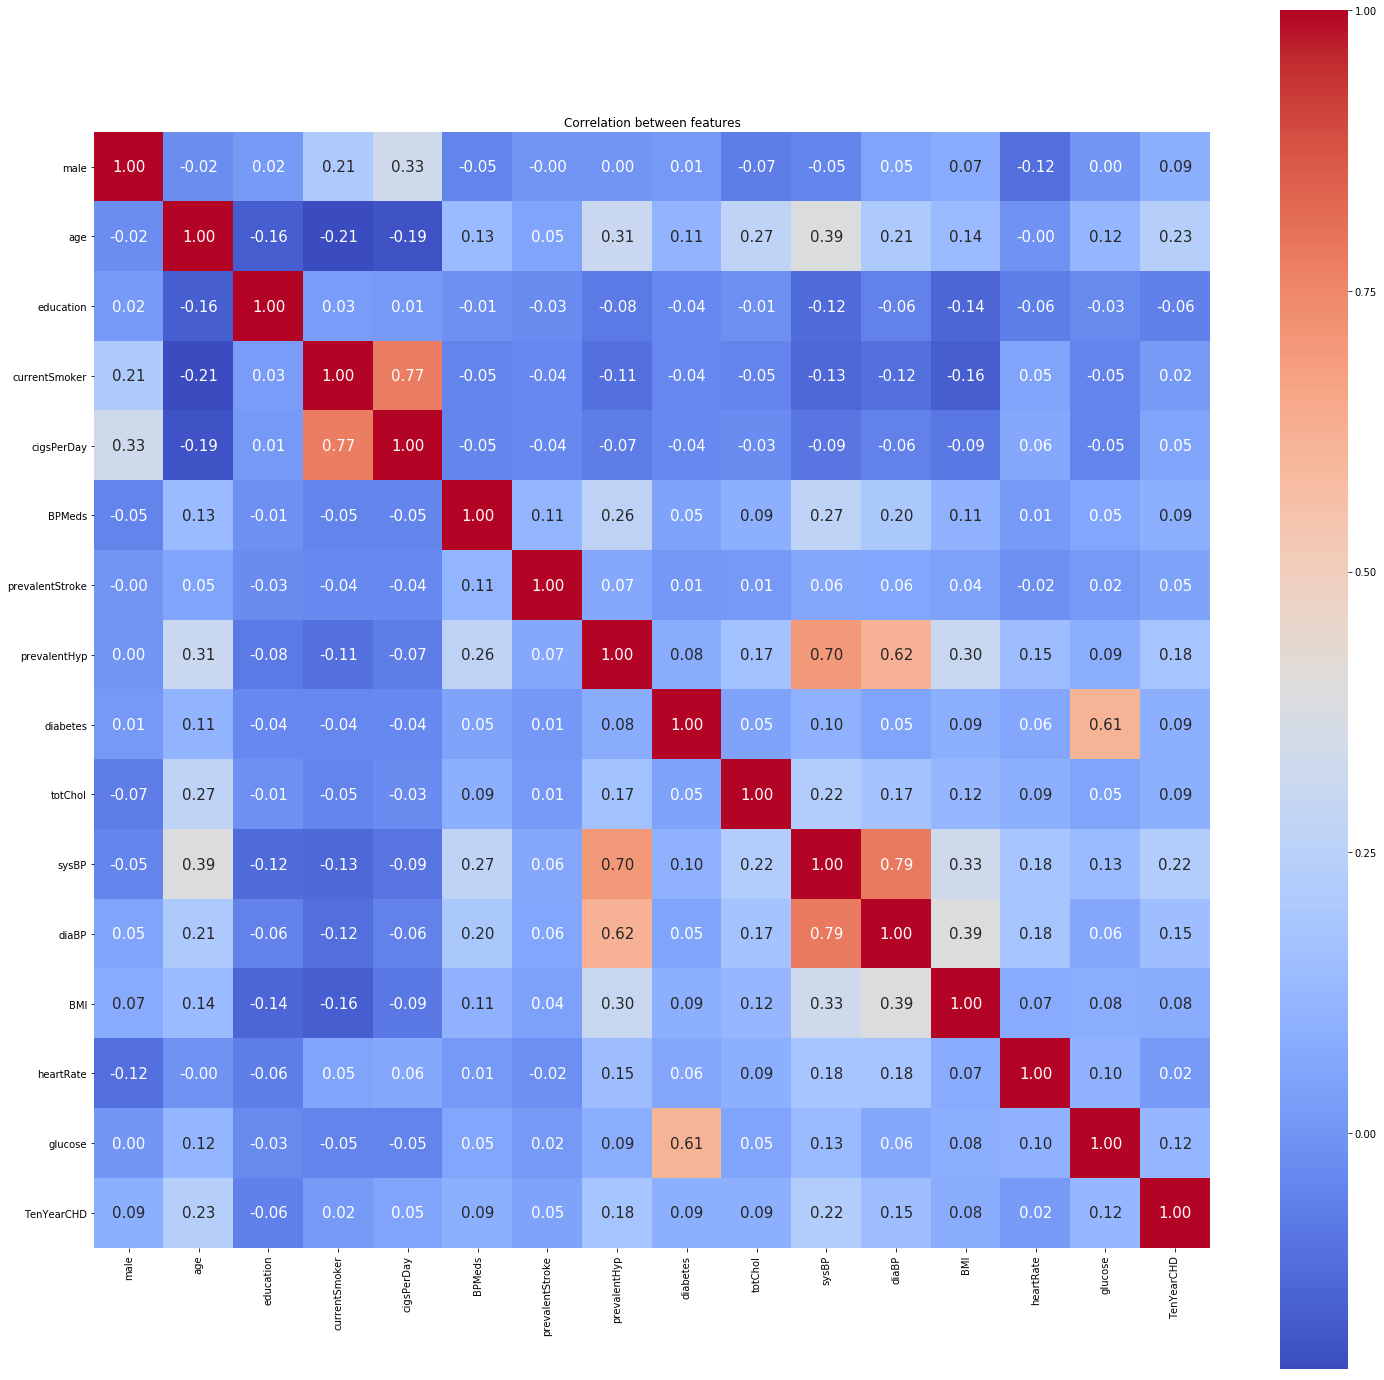

In [107]:
# Correlation
df_corr = df.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(df_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

**Correlated features**

There are highly positive correlation between 3 features sysBP, diaBP, and prevalentHyp, especially sysBP with the 2 others. We will drop sysBP, because this feature will cause duplicated data while training the model.

We also can see the relationship between glucose and diabetes, but it is not closed enough to drop any of them.

In [108]:
# Drop sysBP, the duplicate features that are linearlly correlated from the dataset
df = df.drop(['sysBP'], axis=1)

# result column
y = df['TenYearCHD'] # 1 for has CHD; 0 for not

# features column
X = df.drop(['TenYearCHD'], axis=1)
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,84.0,23.10,85.0,85.0


<a id='Machine_Learning_model'></a>
# Machine Learning & Cross Validation

Create models to predict whether the patient has the risk of experiencing CHD in the next 10 years based on their status features. Select the best of three model and improve the model's accuracy

In [109]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [110]:
# k-folding and train input model type
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output])
    predictions = model.predict(data[prediction_input])
    accuracy = accuracy_score(predictions,data[output])
  
    kf = KFold(n_splits=5, shuffle=True)
    error = []
    for train, test in kf.split(data):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
  
    return accuracy, error

In [111]:
# variables
prediction_var = list(X.columns)
outcome_var= 'TenYearCHD'

In [112]:
# Decision Trees
model_1 = DecisionTreeClassifier()
accuracy, error = classification_model(model_1,df,prediction_var,outcome_var)
decision_tree_score = round(accuracy * 100, 2)
decision_tree_testscore = round(np.mean(error) * 100, 2)
# print('Decision Trees Score: \n', decision_tree_score)
# print('Decision Trees Test Score: \n', decision_tree_testscore)

# Support Vector Machines
model_2 = SVC()
accuracy, error = classification_model(model_2,df,prediction_var,outcome_var)
svm_score = round(accuracy * 100, 2)
svm_testscore = round(np.mean(error) * 100, 2)
# print('Support Vector Machines Score: \n', svm_score)
# print('Support Vector Machines Test Score: \n', svm_testscore)

# K Nearest Neighbors
model_3 = KNeighborsClassifier()
accuracy, error = classification_model(model_3,df,prediction_var,outcome_var)
k_near_score = round(accuracy * 100, 2)
k_near_testscore = round(np.mean(error) * 100, 2)
# print('K Nearest Neighbors Score: \n', k_near_score)
# print('K Nearest Neighbors Test Score: \n', k_near_testscore)

# Random Forests
model_4 = RandomForestClassifier(n_estimators=100)
accuracy, error = classification_model(model_4,df,prediction_var,outcome_var)
rand_forests_score = round(accuracy * 100, 2)
rand_forests_testscore = round(np.mean(error) * 100, 2)
# print('Random Forests Score: \n', rand_forests_score)
# print('Random Forests Test Score: \n', rand_forests_testscore)

# Logistic Regression
model_5 = LogisticRegression()
accuracy, error = classification_model(model_5,df,prediction_var,outcome_var)
log_reg_score = round(accuracy * 100, 2)
log_reg_testscore = round(np.mean(error) * 100, 2)
# print('Logistic Regression Score: \n', log_reg_score)
# print('Logistic Regression Test Score: \n', log_reg_testscore)

# MLPClassifier
model_6 = MLPClassifier()
accuracy, error = classification_model(model_6,df,prediction_var,outcome_var)
mlp_score = round(accuracy * 100, 2)
mlp_testscore = round(np.mean(error) * 100, 2)
# print('MLP Classifier Score: \n', mlp_score)
# print('MLP Classifier Test Score: \n', mlp_testscore)

# GaussianNB
model_7 = GaussianNB()
accuracy, error = classification_model(model_7,df,prediction_var,outcome_var)
gauss_score = round(accuracy * 100, 2)
gauss_testscore = round(np.mean(error) * 100, 2)
# print('Gaussian NB Score: \n', gauss_score)
# print('Gaussian NB Test Score: \n', gauss_testscore)


#Model evaluation
models = pd.DataFrame({
    'Model': [ 'Decision Trees', 'Support Vector Machines', 'K Nearest Neighbors', 'Random Forests', 'Logistic Regression', 'MLP Classifier', 'Gaussian NB'],
    'Score': [ decision_tree_score, svm_score, k_near_score, rand_forests_score, log_reg_score, mlp_score, gauss_score],
    'Test Score': [ decision_tree_testscore, svm_testscore, k_near_testscore, rand_forests_testscore, log_reg_testscore, mlp_testscore, gauss_testscore]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
4,Logistic Regression,85.29,85.07
1,Support Vector Machines,99.97,84.77
3,Random Forests,100.00,84.77
5,MLP Classifier,83.05,84.55
2,K Nearest Neighbors,86.82,83.16
6,Gaussian NB,82.42,82.26
0,Decision Trees,100.00,75.64


In [116]:
# Let's choose our top 3 model: Logistic Regression, Support Vector Machines, Random Forests
# So far the Random Forests is the best balanced model, apply this model to find the top three features
from sklearn.feature_selection import RFE
# choose top 5 features
rfe = RFE(model_4, n_features_to_select=5)
rfe.fit(X,y)
# top 5 features
top = []
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        top.append(X.columns.values[i])
print (top)

['age', 'totChol', 'diaBP', 'BMI', 'glucose']


In [120]:
# lets try printing the top five features
finX = df[top]
finX.head()

,age,totChol,diaBP,BMI,glucose
0,39,195.0,70.0,26.97,77.0
1,46,250.0,81.0,28.73,76.0
2,48,245.0,80.0,25.34,70.0
3,61,225.0,95.0,28.58,103.0
4,46,285.0,84.0,23.10,85.0


These 5 features are the most effective variables to the accuracy of the model.  

In [119]:
### 3 best model model

# Support Vector Machines
model_2 = SVC()
accuracy, error = classification_model(model_2,df,prediction_var,outcome_var)
svm_score = round(accuracy * 100, 2)
svm_testscore = round(np.mean(error) * 100, 2)
# print('Support Vector Machines Score: \n', svm_score)
# print('Support Vector Machines Test Score: \n', svm_testscore)

# Random Forests
model_4 = RandomForestClassifier(n_estimators=100)
accuracy, error = classification_model(model_4,df,top,outcome_var)
rand_forests_score = round(accuracy * 100, 2)
rand_forests_testscore = round(np.mean(error) * 100, 2)
# print('Random Forests Score: \n', rand_forests_score)
# print('Random Forests Test Score: \n', rand_forests_testscore)

# Logistic Regression
model_5 = LogisticRegression()
accuracy, error = classification_model(model_5,df,top,outcome_var)
log_reg_score = round(accuracy * 100, 2)
log_reg_testscore = round(np.mean(error) * 100, 2)
# print('Logistic Regression Score: \n', log_reg_score)
# print('Logistic Regression Test Score: \n', log_reg_testscore)

#Model evaluation
models = pd.DataFrame({
    'Model': [ 'Support Vector Machines', 'Random Forests', 'Logistic Regression'],
    'Score': [ svm_score, rand_forests_score, log_reg_score],
    'Test Score': [ svm_testscore, rand_forests_testscore, log_reg_testscore]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Logistic Regression,84.83,84.83
0,Support Vector Machines,99.97,84.77
1,Random Forests,99.97,83.90


<a id='conclusion'></a>
# Conclusion
These models show that our analysis is highly accurate. Since Logistic Regression gives the best score in testing, we can trust on this model, but it won't hurt if we use it together with the other 2 models to get a better prediction.

Clearly after dropping other features and choosing only top 5 features to train the models, the accuracy doesn't change much, less than 0.2%. By choosing the top 5 features, we can eliminate the other factors. In the other words, in case we cannot collect data for other features or there are missing data in other features, those data still doesn't affect our models much.

Again, age, total cholesterol level, diastolic blood pressure, BMI, and glucose level are the main culprits leading to heart diseases, especially CHD.

<font size="3"><a href='#toC'>To Table of Contents</a></font>